# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json
from pprint import pprint
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [64]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

535

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [84]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


weather_list = []

#Gather the data for City, Latitude, Longitued, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date
print("Begin Data Retrieval")
print("--------------------------")
for city in cities:
    try:
        weather_dict = {}
        response = requests.get(query_url + city).json()
        weather_dict['City'] = city
        weather_dict['Lat'] = response['coord']['lat']
        weather_dict['Lon'] = response['coord']['lon']
        weather_dict['Max Temp'] = response['main']['temp_max']
        weather_dict['Humidity'] = response['main']['humidity']
        weather_dict['Cloudiness'] = response['clouds']['all']
        weather_dict['Wind Speed'] = response['wind']['speed']
        weather_dict['Country'] = response['sys']['country']
        weather_dict['Date'] = response['dt']
        weather_list.append(weather_dict)
        print(f"Processing Record {cities.index(city)} of {len(cities)-1} | {round((cities.index(city)/(len(cities)-1))*100)}% Completed | {city}")
    except:
        print("City not found. Skipping...")
print("--------------------------")
print("Enf of Data Retrieval")

today = date.today()
today = today.strftime("%m/%d/%y")

Begin Data Retrieval
--------------------------
Processing Record 0 of 534 | 0% Completed | ribeira grande
Processing Record 1 of 534 | 0% Completed | punta arenas
Processing Record 2 of 534 | 0% Completed | nikolskoye
Processing Record 3 of 534 | 1% Completed | mount pleasant
Processing Record 4 of 534 | 1% Completed | ushuaia
Processing Record 5 of 534 | 1% Completed | viadana
Processing Record 6 of 534 | 1% Completed | sechura
Processing Record 7 of 534 | 1% Completed | new norfolk
Processing Record 8 of 534 | 1% Completed | georgetown
Processing Record 9 of 534 | 2% Completed | hamilton
Processing Record 10 of 534 | 2% Completed | busselton
Processing Record 11 of 534 | 2% Completed | yellowknife
Processing Record 12 of 534 | 2% Completed | uzhur
Processing Record 13 of 534 | 2% Completed | atuona
Processing Record 14 of 534 | 3% Completed | tias
Processing Record 15 of 534 | 3% Completed | oriximina
Processing Record 16 of 534 | 3% Completed | edea
Processing Record 17 of 534 | 3%

Processing Record 155 of 534 | 29% Completed | kozan
Processing Record 156 of 534 | 29% Completed | royan
Processing Record 157 of 534 | 29% Completed | ryomgard
Processing Record 158 of 534 | 30% Completed | nabire
Processing Record 159 of 534 | 30% Completed | kruisfontein
Processing Record 160 of 534 | 30% Completed | montelibano
Processing Record 161 of 534 | 30% Completed | palmerston
Processing Record 162 of 534 | 30% Completed | ovre ardal
Processing Record 163 of 534 | 31% Completed | ust-koksa
Processing Record 164 of 534 | 31% Completed | belidzhi
Processing Record 165 of 534 | 31% Completed | colwyn bay
Processing Record 166 of 534 | 31% Completed | dikson
Processing Record 167 of 534 | 31% Completed | namatanai
Processing Record 168 of 534 | 31% Completed | chokurdakh
City not found. Skipping...
Processing Record 170 of 534 | 32% Completed | palmer
Processing Record 171 of 534 | 32% Completed | vaini
Processing Record 172 of 534 | 32% Completed | kaeo
Processing Record 173 

Processing Record 311 of 534 | 58% Completed | sola
Processing Record 312 of 534 | 58% Completed | lamar
Processing Record 313 of 534 | 59% Completed | hami
Processing Record 314 of 534 | 59% Completed | wairoa
Processing Record 315 of 534 | 59% Completed | husavik
Processing Record 316 of 534 | 59% Completed | mayor pablo lagerenza
Processing Record 317 of 534 | 59% Completed | los llanos de aridane
Processing Record 318 of 534 | 60% Completed | swan river
City not found. Skipping...
Processing Record 320 of 534 | 60% Completed | celestun
Processing Record 321 of 534 | 60% Completed | oga
Processing Record 322 of 534 | 60% Completed | talcahuano
Processing Record 323 of 534 | 60% Completed | port lincoln
City not found. Skipping...
Processing Record 325 of 534 | 61% Completed | chapais
Processing Record 326 of 534 | 61% Completed | tapes
Processing Record 327 of 534 | 61% Completed | ayotzintepec
Processing Record 328 of 534 | 61% Completed | bethel
Processing Record 329 of 534 | 62% 

Processing Record 466 of 534 | 87% Completed | den helder
Processing Record 467 of 534 | 87% Completed | jaumave
Processing Record 468 of 534 | 88% Completed | mosetse
City not found. Skipping...
Processing Record 470 of 534 | 88% Completed | ketchikan
Processing Record 471 of 534 | 88% Completed | kihei
Processing Record 472 of 534 | 88% Completed | olafsvik
Processing Record 473 of 534 | 89% Completed | porosozero
Processing Record 474 of 534 | 89% Completed | sadao
Processing Record 475 of 534 | 89% Completed | ceres
Processing Record 476 of 534 | 89% Completed | tuburan
City not found. Skipping...
Processing Record 478 of 534 | 90% Completed | banda aceh
Processing Record 479 of 534 | 90% Completed | coahuayana
City not found. Skipping...
Processing Record 481 of 534 | 90% Completed | saint-jean-port-joli
Processing Record 482 of 534 | 90% Completed | peddapuram
City not found. Skipping...
Processing Record 484 of 534 | 91% Completed | torres
Processing Record 485 of 534 | 91% Comp

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [85]:
weather_df = pd.DataFrame(weather_list)
weather_df.head(5)

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,60.51,89,98,14.54,PT,1614397633
1,punta arenas,-53.1500,-70.9167,48.20,87,0,8.05,CL,1614397592
2,nikolskoye,59.7035,30.7861,35.60,93,90,8.95,RU,1614397581
3,mount pleasant,32.7941,-79.8626,60.01,100,40,7.74,US,1614397555
4,ushuaia,-54.8000,-68.3000,53.60,71,20,6.91,AR,1614397556


In [86]:
weather_df.to_csv(output_data_file,index=False,header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [87]:
weather_df.loc[weather_df['Humidity']>100,:]

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [88]:
#  Get the indices of cities that have humidity over 100%.
# Not applicable but here is how I would have done it
rows_bye_bye = weather_df.loc[weather_df['Humidity']>100,:].index
rows_bye_bye

Int64Index([], dtype='int64')

In [89]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(index=rows_bye_bye,inplace=False)
clean_city_data
print(f'Went from {len(weather_df)} rows to {len(clean_city_data)} i.e. Removed {len(weather_df)-len(clean_city_data)} rows of data')

Went from 487 rows to 487 i.e. Removed 0 rows of data


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

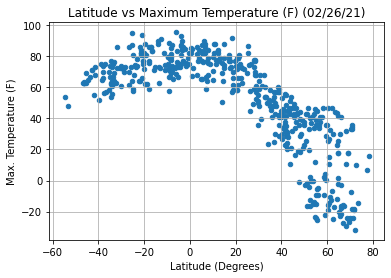

In [90]:
weather_df.plot(kind="scatter",x="Lat",y="Max Temp",title=f"Latitude vs Maximum Temperature (F) ({today})")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude (Degrees)")
plt.grid()

# Scatter plot shows changes in maximum temperature at different latitudes. As expected the higher in latitude the colder it gets, however, I am surprised to see that the lower in latitude the drop in temperature is not as pronounced.

## Latitude vs. Humidity Plot

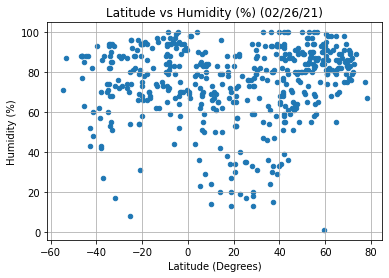

In [91]:
weather_df.plot(kind="scatter",x="Lat",y="Humidity",title=f"Latitude vs Humidity (%) ({today})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (Degrees)")
plt.grid()

# Scatter plot shows changes in humidity at different latitudes. It appears to have no significant correlation.

## Latitude vs. Cloudiness Plot

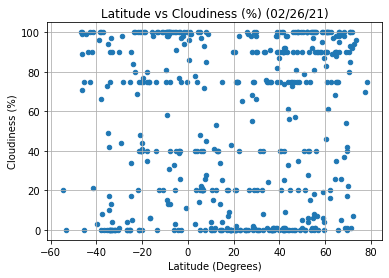

In [93]:
weather_df.plot(kind="scatter",x="Lat",y="Cloudiness",title=f"Latitude vs Cloudiness (%) ({today})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude (Degrees)")
plt.grid()

# Scatter plot shows changes in Cloudiness at different latitudes. It appears to have no significant correlation

## Latitude vs. Wind Speed Plot

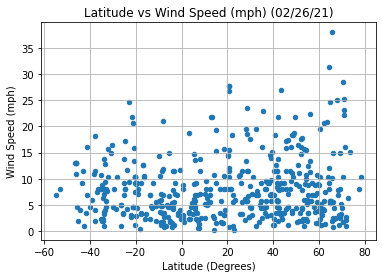

In [94]:
weather_df.plot(kind="scatter",x="Lat",y="Wind Speed",title=f"Latitude vs Wind Speed (mph) ({today})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (Degrees)")
plt.grid()

# Scatter plot shows changes in wind speed at different latitudes. It appears to have no significant correlation.

## Linear Regression

In [98]:
NH_df = weather_df.loc[weather_df['Lat']>0,:]
SH_df = weather_df.loc[weather_df['Lat']<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-square = 0.72


Text(5, 0, 'Temp = -1.35x Lat + 93.42')

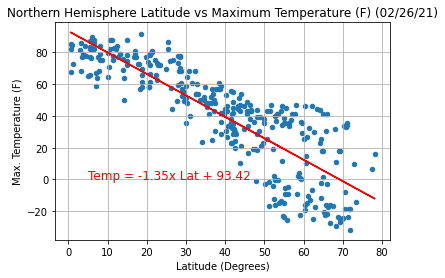

In [127]:
NH_df.plot(kind="scatter",x="Lat",y="Max Temp",title=f"Northern Hemisphere Latitude vs Maximum Temperature (F) ({today})")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude (Degrees)")
plt.grid()
correlation = st.pearsonr(NH_df["Lat"],NH_df["Max Temp"])
print(f"R-square = {round(correlation[0]**2,2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(NH_df["Lat"],NH_df["Max Temp"])
regress_values = NH_df["Lat"] * slope + intercept
line_eq = "Temp = " + str(round(slope,2)) + "x Lat + " + str(round(intercept,2))
plt.plot(NH_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(5,0),fontsize=12,color="r")

# An R-square of 0.72 indicates a very strong correlation between latitude and maximum temperature in the Northern Hemisphere. Variation is greather after latitude 50. The correlation is a negative correlation. The higher the latitude the lower the max temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-square = 0.3


Text(-35, 50, 'Temp = 0.39x Lat + 81.76')

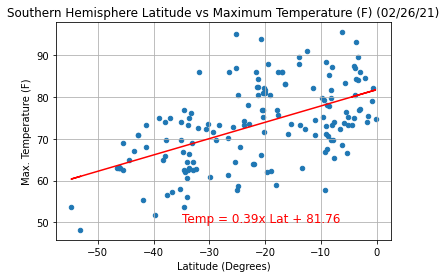

In [128]:
SH_df.plot(kind="scatter",x="Lat",y="Max Temp",title=f"Southern Hemisphere Latitude vs Maximum Temperature (F) ({today})")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude (Degrees)")
plt.grid()
correlation = st.pearsonr(SH_df["Lat"],SH_df["Max Temp"])
print(f"R-square = {round(correlation[0]**2,2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(SH_df["Lat"],SH_df["Max Temp"])
regress_values = SH_df["Lat"] * slope + intercept
line_eq = "Temp = " + str(round(slope,2)) + "x Lat + " + str(round(intercept,2))
plt.plot(SH_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-35,50),fontsize=12,color="r")

# An R-square of 0.3 indicates a weak correlation between latitude and maximum temperature in the Southern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-square = 0.12


Text(5, 0, 'Humidity = 0.34x Lat + 59.57')

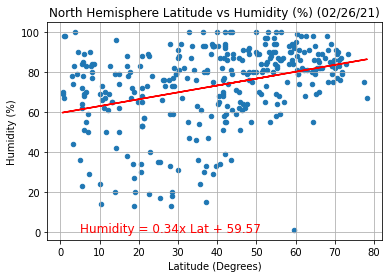

In [118]:
NH_df.plot(kind="scatter",x="Lat",y="Humidity",title=f"Northern Hemisphere Latitude vs Humidity (%) ({today})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (Degrees)")
plt.grid()
correlation = st.pearsonr(NH_df["Lat"],NH_df["Humidity"])
print(f"R-square = {round(correlation[0]**2,2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(NH_df["Lat"],NH_df["Humidity"])
regress_values = NH_df["Lat"] * slope + intercept
line_eq = "Humidity = " + str(round(slope,2)) + "x Lat + " + str(round(intercept,2))
plt.plot(NH_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(5,0),fontsize=12,color="r")

# The R-square value indicates a weak correlation between latitude and humidity in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-square = 0.04


Text(-30, 20, 'Humidity = 0.24x Lat + 82.4')

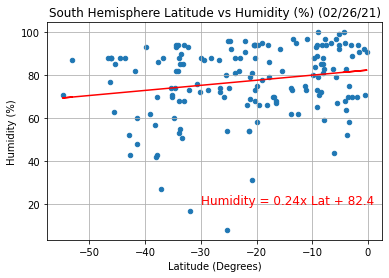

In [117]:
SH_df.plot(kind="scatter",x="Lat",y="Humidity",title=f"Southern Hemisphere Latitude vs Humidity (%) ({today})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (Degrees)")
plt.grid()
correlation = st.pearsonr(SH_df["Lat"],SH_df["Humidity"])
print(f"R-square = {round(correlation[0]**2,2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(SH_df["Lat"],SH_df["Humidity"])
regress_values = SH_df["Lat"] * slope + intercept
line_eq = "Humidity = " + str(round(slope,2)) + "x Lat + " + str(round(intercept,2))
plt.plot(SH_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="r")

# The R-square value indicates no correlation between latitude and humidity in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-square = 0.07


Text(40, 40, 'Cloudiness = 0.5x Lat + 29.97')

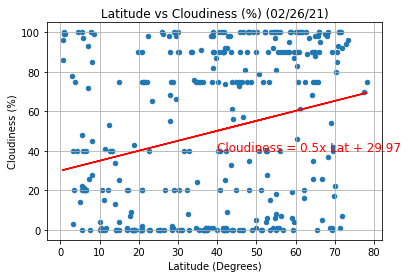

In [120]:
NH_df.plot(kind="scatter",x="Lat",y="Cloudiness",title=f"Northern Hemisphere Latitude vs Cloudiness (%) ({today})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude (Degrees)")
plt.grid()
correlation = st.pearsonr(NH_df["Lat"],NH_df["Cloudiness"])
print(f"R-square = {round(correlation[0]**2,2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(NH_df["Lat"],NH_df["Cloudiness"])
regress_values = NH_df["Lat"] * slope + intercept
line_eq = "Cloudiness = " + str(round(slope,2)) + "x Lat + " + str(round(intercept,2))
plt.plot(NH_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=12,color="r")

# The R-square value indicates no correlation between latitude and clodiness in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-square = 0.03


Text(-40, 40, 'Cloudiness = 0.47x Lat + 65.28')

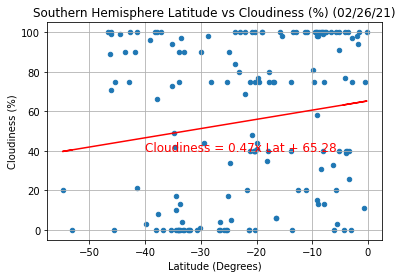

In [129]:
SH_df.plot(kind="scatter",x="Lat",y="Cloudiness",title=f"Southern Hemisphere Latitude vs Cloudiness (%) ({today})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude (Degrees)")
plt.grid()
correlation = st.pearsonr(SH_df["Lat"],SH_df["Cloudiness"])
print(f"R-square = {round(correlation[0]**2,2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(SH_df["Lat"],SH_df["Cloudiness"])
regress_values = SH_df["Lat"] * slope + intercept
line_eq = "Cloudiness = " + str(round(slope,2)) + "x Lat + " + str(round(intercept,2))
plt.plot(SH_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=12,color="r")

# The R-square value indicates no correlation between latitude and clodiness in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-square = 0.01


Text(10, 30, 'Wind Speed = 0.03x Lat + 7.02')

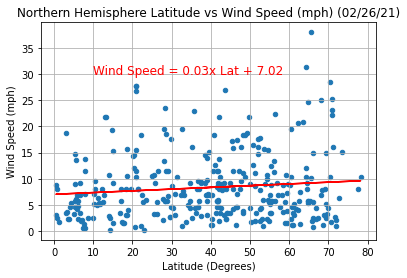

In [124]:
NH_df.plot(kind="scatter",x="Lat",y="Wind Speed",title=f"Northern Hemisphere Latitude vs Wind Speed (mph) ({today})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (Degrees)")
plt.grid()
correlation = st.pearsonr(NH_df["Lat"],NH_df["Wind Speed"])
print(f"R-square = {round(correlation[0]**2,2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(NH_df["Lat"],NH_df["Wind Speed"])
regress_values = NH_df["Lat"] * slope + intercept
line_eq = "Wind Speed = " + str(round(slope,2)) + "x Lat + " + str(round(intercept,2))
plt.plot(NH_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=12,color="r")

# The R-square value indicates no correlation between latitude and wind speed in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-square = 0.04


Text(-50, 20, 'Wind Speed = -0.07x Lat + 5.7')

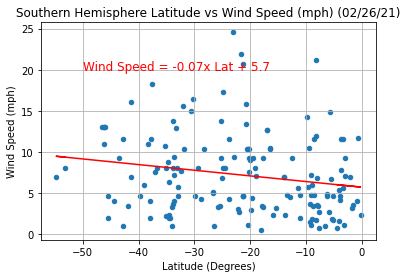

In [126]:
SH_df.plot(kind="scatter",x="Lat",y="Wind Speed",title=f"Southern Hemisphere Latitude vs Wind Speed (mph) ({today})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (Degrees)")
plt.grid()
correlation = st.pearsonr(SH_df["Lat"],SH_df["Wind Speed"])
print(f"R-square = {round(correlation[0]**2,2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(SH_df["Lat"],SH_df["Wind Speed"])
regress_values = SH_df["Lat"] * slope + intercept
line_eq = "Wind Speed = " + str(round(slope,2)) + "x Lat + " + str(round(intercept,2))
plt.plot(SH_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=12,color="r")

# The R-square value indicates no correlation between latitude and wind speed in the Southern Hemisphere.